In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
sns.set()

world_cup = pd.read_csv('World_Cup_2022.csv')
results = pd.read_csv('results.csv')

In [2]:
world_cup.head()
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland


In [3]:
#Adding goal difference and establishing who is the winner 
winner = []
for i in range (len(results['home_team'])):
    if results ['home_score'][i] > results['away_score'][i]:
        winner.append(results['home_team'][i])
    elif results['home_score'][i] < results ['away_score'][i]:
        winner.append(results['away_team'][i])
    else:
        winner.append('Draw')
results['winning_team'] = winner

#adding goal difference column
results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,Scotland,3


In [141]:
df = results[(results['home_team'] == 'Tunisia') | (results['away_team'] == 'Tunisia')]
tunisia = df.iloc[:]
tunisia.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
4099,1957-06-02,Tunisia,Libya,4,2,Friendly,Tunis,Tunisia,Tunisia,2
4276,1958-05-09,Tunisia,Libya,4,1,Friendly,Tunis,Tunisia,Tunisia,3
4416,1959-03-08,Tunisia,Malta,0,0,Friendly,Tunis,Tunisia,Draw,0
4584,1960-01-03,Tunisia,Yugoslavia,1,5,Friendly,Tunis,Tunisia,Yugoslavia,4
4659,1960-06-05,Tunisia,Iraq,2,1,Friendly,Tunis,Tunisia,Tunisia,1


In [142]:
year = []
for row in tunisia['date']:
    year.append(int(row[:4]))
tunisia['match_year'] = year
tunisia_1930 = tunisia[tunisia.match_year >= 1930]
tunisia_1930.count()

date               550
home_team          550
away_team          550
home_score         550
away_score         550
tournament         550
city               550
country            550
winning_team       550
goal_difference    550
match_year         550
dtype: int64

<AxesSubplot:xlabel='Tunisia_Results', ylabel='count'>

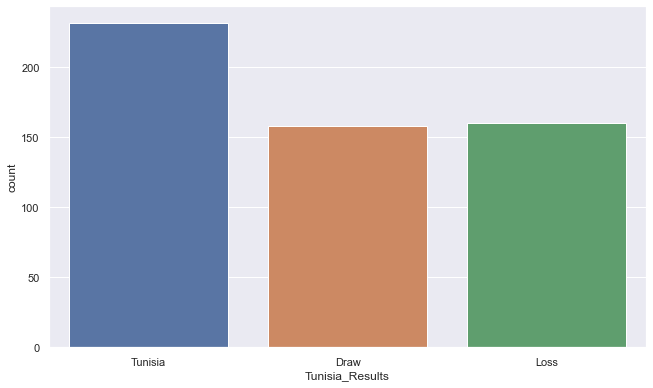

In [143]:
wins = []
for row in tunisia_1930['winning_team']:
    if row != 'Tunisia' and row != 'Draw':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf = pd.DataFrame(wins, columns = ['Tunisia_Results'])

fig, ax = plt.subplots(1)
fig.set_size_inches(10.7,6.27)
sns.set(style = 'darkgrid')
sns.countplot(x = 'Tunisia_Results', data=winsdf)

In [144]:
worldcup_teams = ['Australia', 'Iran', 'Japan', 'Korea Republic',
                  'Saudi Arabia', 'Egypt', 'Morocco', 'Nigeria',
                  'Senegal', 'Tunisia', 'Costa Rica', 'Mexico',
                  'Panama', 'Argentina', 'Brazil', 'Colombia',
                  'Peru', 'Uruguay', 'Belgium', 'Croatia',
                  'Denmark', 'England', 'France', 'Germany',
                  'Iceland', 'Poland', 'Portugal', 'Russia',
                  'Serbia', 'Spain', 'Sweden', 'Switzerland']

df_teams_home = results[results['home_team'].isin(worldcup_teams)]
df_teams_away = results[results['away_team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year
df_teams_1930 = df_teams[df_teams.match_year >= 1930]
df_teams_1930.head()

df_teams_1930 = df_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country',
                               'goal_difference', 'match_year'], axis = 1)

df_teams_1930.head()

,home_team,away_team,winning_team
1,England,Scotland,England
3,England,Scotland,Draw
6,England,Scotland,Scotland
10,England,Wales,England
11,England,Scotland,England


In [145]:
df_teams_1930 = df_teams_1930.reset_index(drop=True)
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.home_team,'winning_team']=2
df_teams_1930.loc[df_teams_1930.winning_team == 'Draw', 'winning_team']=1
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.away_team, 'winning_team']=0

df_teams_1930.head()

,home_team,away_team,winning_team
0,England,Scotland,2
1,England,Scotland,1
2,England,Scotland,0
3,England,Wales,2
4,England,Scotland,2


In [146]:
final = pd.get_dummies(df_teams_1930, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Separate X and y sets
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [147]:
final.head()

,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
final.head()
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print('Training set accuracy ', '%.3f'%(score))
print('Test set accuracy ', '%.3f'%(score2))

Training set accuracy  0.572
Test set accuracy  0.564


C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [149]:
# Loading new datasets
fixtures = pd.read_csv('fixtures.csv')
ranking = pd.read_csv('fifa_rankings.csv', encoding = 'latin-1')

# List for storing the group stage games
pred_set = []

# Create new columns with ranking position of each team
fixtures.insert(1, 'first_position', fixtures['Home Team'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Away Team'].map(ranking.set_index('Team')['Position']))

# We only need the group stage games, so we have to slice the dataset
fixtures = fixtures.iloc[:48, :]
fixtures.head()
#print(fixtures)

,Round Number,first_position,second_position,Date,Location,Home Team,Away Team,Group,Result
0,1,66,70,14/06/2018 18:00,"Luzhniki Stadium, Moscow",Russia,Saudi Arabia,Group A,5 - 0
1,1,46,17,15/06/2018 15:00,Ekaterinburg Stadium,Egypt,Uruguay,Group A,0 - 1
2,1,42,36,15/06/2018 18:00,Saint Petersburg Stadium,Morocco,Iran,Group B,0 - 1
3,1,4,8,15/06/2018 21:00,"Fisht Stadium, Sochi",Portugal,Spain,Group B,3 - 3
4,1,7,40,16/06/2018 13:00,Kazan Arena,France,Australia,Group C,2 - 1


In [150]:
#ajouter des équipes à un nouveau jeu de données de prédiction basé sur la position de classement de chaque équipe.
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winning_team': None})
    else:
        pred_set.append({'home_team': row['Away Team'], 'away_team': row['Home Team'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set.head()


,home_team,away_team,winning_team
0,Russia,Saudi Arabia,None
1,Uruguay,Egypt,None
2,Iran,Morocco,None
3,Portugal,Spain,None
4,France,Australia,None


In [151]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

# Remove winning team column
pred_set = pred_set.drop(['winning_team'], axis=1)
pred_set.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\429855228.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
predictions = logreg.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + ' and ' + backup_pred_set.iloc[i, 0])
    if predictions[i] == 2:
        print('Winner: ' + backup_pred_set.iloc[i, 1])
    elif predictions[i] == 1:
        print('Draw')
    elif predictions[i] == 0:
        print('Winner: ' + backup_pred_set.iloc[i, 0])
    print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
    print('Probability of ' + backup_pred_set.iloc[i,0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
    print('')

Saudi Arabia and Russia
Winner: Saudi Arabia
Probability of Draw:  0.213
Probability of Russia winning:  0.088

Egypt and Uruguay
Winner: Egypt
Probability of Draw:  0.285
Probability of Uruguay winning:  0.077

Morocco and Iran
Winner: Morocco
Probability of Draw:  0.326
Probability of Iran winning:  0.288

Spain and Portugal
Draw
Probability of Draw:  0.358
Probability of Portugal winning:  0.327

Australia and France
Winner: Australia
Probability of Draw:  0.227
Probability of France winning:  0.146

Iceland and Argentina
Winner: Iceland
Probability of Draw:  0.092
Probability of Argentina winning:  0.027

Denmark and Peru
Winner: Peru
Probability of Draw:  0.159
Probability of Peru winning:  0.447

Nigeria and Croatia
Winner: Nigeria
Probability of Draw:  0.318
Probability of Croatia winning:  0.131

Serbia and Costa Rica
Winner: Serbia
Probability of Draw:  0.311
Probability of Costa Rica winning:  0.315

Mexico and Germany
Winner: Mexico
Probability of Draw:  0.268
Probability of

In [153]:
group_16 = [('Uruguay', 'Portugal'),
            ('France', 'Argentina'),
            ('Brazil', 'Mexico'),
            ('England', 'Colombia'),
            ('Spain', 'Russia'),
            ('Croatia', 'Denmark'),
            ('Sweden', 'Switzerland'),
            ('Japan', 'Belgium')]

In [154]:
def clean_and_predict(matches, ranking, final, logreg):
    #Initialization of auxiliary list for data cleaning
    positions = []

    #Loop to retrieve each team's position according to FIFA ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0], 'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1], 'Position'].iloc[0])

    #Creating the DataFrame for prediction
    pred_set = []

    #initalizaing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'position' list, and 'j' for the list of matches (list of tuples)

    while i < len(positions):
        dict1 = {}

        # if position of first team is better, he will be the 'home' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'home_team': matches[j][0], 'away_team': matches[j][1]})
        else:
            dict1.update({'home_team': matches[j][1], 'away_team': matches[j][0]})

        #Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1

    #Covert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    #Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix = ['home_team', 'away_team'], columns = ['home_team', 'away_team'])

    #Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    #Remove winning team column
    pred_set = pred_set.drop(['winning_team'], axis=1)

    #Prediction
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i,1] + ' and ' + backup_pred_set.iloc[i,0])
        if predictions[i] == 2:
            print('Winner: ' + backup_pred_set.iloc[i,1])
        elif predictions[i] == 1:
            print('Draw')
        elif predictions[i] == 0:
            print('Winner: ' + backup_pred_set.iloc[i, 0])
        print('Probability of ' + backup_pred_set.iloc[i,1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
        print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
        print('Probaility of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
        print('')

clean_and_predict(group_16, ranking, final, logreg)

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

Uruguay and Portugal
Winner: Uruguay
Probability of Uruguay winning:  0.441
Probability of Draw:  0.284
Probaility of Portugal winning:  0.275

France and Argentina
Winner: France
Probability of France winning:  0.615
Probability of Draw:  0.229
Probaility of Argentina winning:  0.156

Mexico and Brazil
Winner: Mexico
Probability of Mexico winning:  0.708
Probability of Draw:  0.198
Probaility of Brazil winning:  0.094

Colombia and England
Winner: Colombia
Probability of Colombia winning:  0.506
Probability of Draw:  0.370
Probaility of England winning:  0.124

Russia and Spain
Winner: Russia
Probability of Russia winning:  0.497
Probability of Draw:  0.291
Probaility of Spain winning:  0.213

Croatia and Denmark
Winner: Croatia
Probability of Croatia winning:  0.385
Probability of Draw:  0.232
Probaility of Denmark winning:  0.383

Sweden and Switzerland
Winner: Switzerland
Probability of Sweden winning:  0.377
Probability of Draw:  0.230
Probaility of Switzerland winning:  0.393

Ja

In [158]:
quarters = [('Uruguay', 'France'),
            ('Russia', 'Croatia'),
            ('Brazil', 'Belgium'),
            ('England', 'Sweden')]

clean_and_predict(quarters, ranking, final, logreg)

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

Uruguay and France
Winner: Uruguay
Probability of Uruguay winning:  0.497
Probability of Draw:  0.205
Probaility of France winning:  0.298

Russia and Croatia
Draw
Probability of Russia winning:  0.300
Probability of Draw:  0.379
Probaility of Croatia winning:  0.321

Belgium and Brazil
Winner: Belgium
Probability of Belgium winning:  0.702
Probability of Draw:  0.189
Probaility of Brazil winning:  0.108

Sweden and England
Winner: Sweden
Probability of Sweden winning:  0.563
Probability of Draw:  0.268
Probaility of England winning:  0.169



In [156]:
semi = [('France', 'Belgium'),
        ('Croatia', 'England')]

clean_and_predict(semi, ranking, final, logreg)

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

France and Belgium
Winner: France
Probability of France winning:  0.413
Probability of Draw:  0.225
Probaility of Belgium winning:  0.362

Croatia and England
Winner: Croatia
Probability of Croatia winning:  0.504
Probability of Draw:  0.277
Probaility of England winning:  0.219



In [157]:
finals = [('France', 'Croatia')]

clean_and_predict(finals, ranking, final, logreg)

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

Croatia and France
Winner: Croatia
Probability of Croatia winning:  0.470
Probability of Draw:  0.220
Probaility of France winning:  0.310



C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\PC\AppData\Local\Temp\ipykernel_12868\3322078265.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
